
<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

# **Taller guiado de correlación**

Este taller guiado tiene como objetivo hacer un acercamiento práctico al análisis de correlaciones y una introducción al análisis de regresión.

En este taller guiado veremos como:



## **1. Instalar e importar los paquetes necesarios**

In [1]:
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn',sns.__version__)

Python 3.10.12
NumPy 1.26.4
Pandas 2.1.4
Matplotlib 3.7.1
Seaborn 0.13.1


## **2. Cargar datos**

Para este taller vamos a utilizar algunos datos sintéticos pero también los datasets que ya conocen como el dataset Iris y el dataset housepricing, para mayor información consulte:

* https://www.kaggle.com/ashydv/housing-dataset

* https://archive.ics.uci.edu/ml/datasets/Iris

In [4]:
variables = ['sepal_length','sepal_width','petal_length','petal_width','species']
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names= variables)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
housing = pd.read_csv("https://raw.githubusercontent.com/HarryVargas96/UdeCataluna/main/Housing.csv")

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## **3. Análisis de correlación**

Este es un tipo de análisis estadístico usado para medir la fortaleza de relaciones lineas entre dos variables y medir su grado de asociación. Esto se logra calculando coeficientes de correlación que permiten cuantificar el grado de asociación entre dos variables.

### **3.1 Coeficientes de correlación**

Los coeficientes toman valores entre -1.0 y 1.0. Toman valores positivos cuando las variables son directamente proporcionales, y valores negativos cuando la relación entre las variables es inversamente proporcional. La fortaleza de la correlación se incrementa hacía los extremos -1.0 y 1.0, y es más débil cuando se acerca a 0.

Existen 3 tipos de coeficientes de correlación

* **Coeficiente de correlación $r$ de Pearson**: Este es el coeficiente de correlación más conocido y ampliamente utilizado. Es útil para el análisis de variables cuantitativas. Este es un método parámetrico, eso quiere decir que parte de varios supuestos sobre las variables analizadas, como la normalidad de las variables y la homegeneidad de varianzas.
* **Coeficientes de correlación $\rho$ de Spearman**: Es un método no paramétrico, puede ser utilizado con variables categóricas ordinales o variables numéricas. Las variables pueden no ser normales y puede no haber homogeneidad de varianzas.
* **Coeficiente de correlación $\tau$ de Kendall**:
Este tmabién es un método no parámetrico empleado para variables categóricas ordinales. Evalua relaciones monotónicas entre las variables analizadas. Es computacionalmente más costoso.

### Con Pandas...

Se puede hacer análisis de correlación empleando pandas, numpy o scipy. Empezaremos con los métodos más básicos usando pandas.

* `pd.Series.corr`: Permite calcular el coeficiente de correlación de una serie con otra.
* `pd.DataFrame.corrwith`: Calula correlación entre las filas o columnas de un DataFrame contra las filas o columnas de una Series u otro DataFrame.

* `pd.Dataframe.corr`: Calcula la matriz de correlación entre las columnas de un DataFrame.

Todos estos métodos pueden trabajar con los métodos `'pearson', 'kendall', 'spearman'`, por defecto si no se epecífica se trabaja con pearson.



Primero vamos a crear algunos datos de ejemplo para trabajar.



In [8]:
np.random.seed(1) # Semilla para que genere los mismos estados aleatorias

v1 = pd.Series(range(100)) # recuerde range inicia desde 0 y por defecto va de uno a uno
v2 = pd.Series(range(100,0,-1))

# Generación de números enteros aleatorios
v3 = pd.Series(np.random.randint(0,100,100)) # valor minimo, valor maximo, cantidad de números
v4 = pd.Series(np.random.randint(0,100,100))

datos = pd.DataFrame(data={'v1':v1,
                           'v2':v2,
                           'v3':v3,
                           'v4':v4, })

datos

,v1,v2,v3,v4
0,0,100,37,0
1,1,99,12,77
2,2,98,72,6
3,3,97,9,52
4,4,96,75,85
...,...,...,...,...
95,95,5,23,77
96,96,4,55,91
97,97,3,65,49
98,98,2,77,47


In [9]:
# Esta función nos va a ayudar a ahorrar código
# Va a graficar la relación entre un par de variables presentes en el mismo dataframe
# También va a calcular el coeficiente de correlación de pearson y va a mostrarlo

def graficar_correlacion(df, var_a, var_b):

  coef = df[var_a].corr(df[var_b]); # Calcula el coeficiente de correlacion

  fig, axes = plt.subplots(dpi = 110);

  sns.scatterplot(data = df,
                  x = var_a, y = var_b,

                  ax = axes,
                  marker='o',
                  linestyle='None',
                  s = 50,  # tamaño de los puntos
                  alpha = 0.5,  # grado de transparencia
                  );

  axes.set_title(f"Coeficiente de correlación: {coef :.2}") # titulo con formateo de string

Veremos algunos casos que se pueden presentar en el análisis de correlación.

In [10]:
# Correlación perfecta positiva - relación directa, entre v1 y v1

r = v1.corr(v1)
r

0.9999999999999999

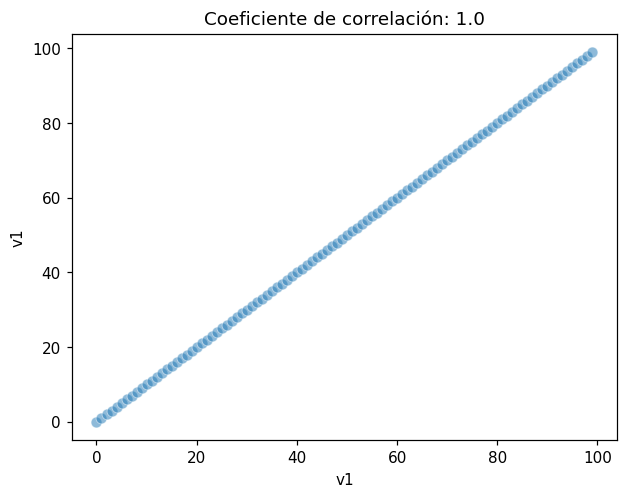

In [11]:
# Es valioso y además recomendado acompañar el cálculo de coeficientes de correlación con visualización

graficar_correlacion(datos,'v1','v1')

In [12]:
# Correlación perfecta negativa, relación inversa entre V1 y V2

r = v1.corr(v2)
r


-0.9999999999999999

In [13]:
datos['v1'].corr(datos['v2'])

-0.9999999999999999

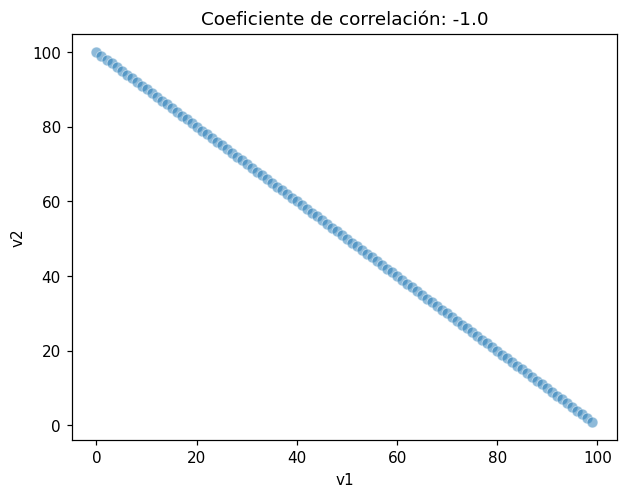

In [14]:
graficar_correlacion(datos,'v1','v2')

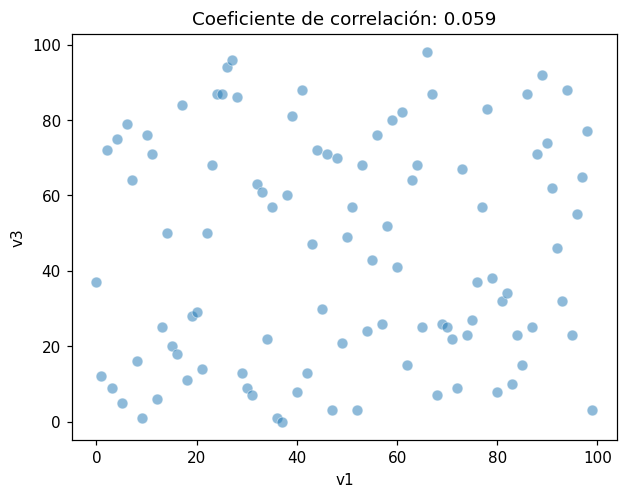

In [15]:
graficar_correlacion(datos,'v1','v3')

### Matriz de confusión

Este método es muy valioso porque permite evaluar la correlación entre cada par de variables presentes en el dataset. La matriz obtenida es simétrica ya que el coeficiente de correlación no depende del orden.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [16]:
a = datos.corr()
a

,v1,v2,v3,v4
v1,1.000000,-1.000000,0.058680,0.022354
v2,-1.000000,1.000000,-0.058680,-0.022354
v3,0.058680,-0.058680,1.000000,-0.064611
v4,0.022354,-0.022354,-0.064611,1.000000


<Axes: >

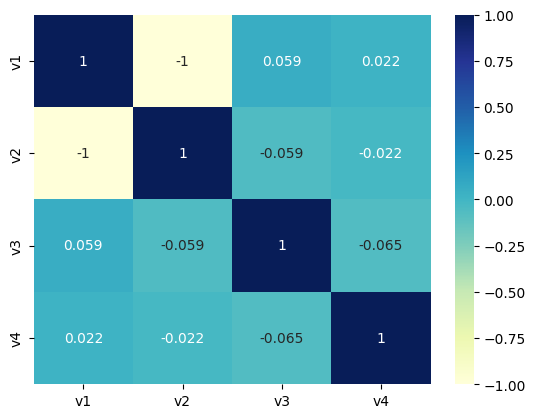

In [17]:
sns.heatmap(data = a,
            vmin = -1,
            vmax = 1,
            center = 0,
            annot = True,
            cmap="YlGnBu")

In [18]:
housing.corr(numeric_only=True)

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


### **Ejercicio**:

* Calcule el coeficiente de correlación entre las variables área y precio del dataset housing. Elabore una grafica que le permita evaluar visualmente la relación entre estas variables.
* Calcule la matriz de correlación para las variables cuantitativas presentes en Iris

### Con Scipy

Ahora, pasando a la librería Scipy. Es importante a la hora de reportar coeficientes de correlación soportar las conclusiones con la estadística inferencial, para establecer los niveles de significacia de las relaciones encontradas.

Para conocer el coeficiente de correlación y el p_value se pueden usar los siguientes métodos:

* [**`stats.pearsonr`**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html): coeficiente de correlación $r$ de Pearson.
* [**`stats.spearmanr`**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html): coeficiente de correlación $\rho$ de Spearman.
* [**`stats.kendalltau`**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html): coeficiente de correlación $\tau$ de Kendall.

Estas funciones reciben como parámetros los arreglos **`x`** y **`y`**, y retornan:
* El coeficiente de correlación correspondiente.
* El **p-valor** para un test de hipótesis cuya hipótesis nula es que los datos no están correlacionados. Por lo tanto, si el **p-valor $\lt \alpha$** (nivel de significancia), esto quiere decir que la correlación es significativa. De lo contrario, la correlación puede deberse a la aleatoriedad de los datos, independientemente de su valor.

Generalmente se trabaja con un nivel de significancia $ \alpha=0.05$, entonces si el p-valor es menor a 0.05 se puede establecer que la correlación es significativa.

In [19]:
x = housing['price']
y = housing['area']

coef, p = stats.pearsonr(x, y)
print(coef,p)

0.5359973457780801 7.388225401521874e-42


### **Ejercicio**

Calcule el coeficiente de correlación de Pearson y el p-valor de las posibles combinaciones 6 combinaciones entre las variables cuantitativas del dataset Iris. Establezca la fortaleza de la correlación y determine si es o no significativa.

Para lo anterior declare una función que reciba dos arreglos `x` y `y` y retorne un mensaje con el coeficiente de correlación, el p valor y si la correlación es o no es significativa.

**Ejemplo:**
```
Input:
correlacion(x,y)

Output:
El coeficiente de correlación es: 0,869
El p-value es: 0.0048
La correlación es significativa
```

## **Recursos adicionales**

## **Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*